In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [2]:
start = '2015-01-01'
end = '2024-12-31'

df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288588,24.757342,23.848713,24.746234,212818400
2015-01-05,23.604334,24.137514,23.417722,24.057537,257142000
2015-01-06,23.606564,23.866489,23.244444,23.668768,263188400
2015-01-07,23.937574,24.037545,23.704307,23.815387,160423600
2015-01-08,24.857309,24.915071,24.148623,24.266369,237458000


In [3]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800
2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700
2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100
2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300
2024-12-30,251.593094,252.889969,250.146586,251.623020,35557500


In [4]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.288588,24.757342,23.848713,24.746234,212818400
1,2015-01-05,23.604334,24.137514,23.417722,24.057537,257142000
2,2015-01-06,23.606564,23.866489,23.244444,23.668768,263188400
3,2015-01-07,23.937574,24.037545,23.704307,23.815387,160423600
4,2015-01-08,24.857309,24.915071,24.148623,24.266369,237458000


In [5]:
df = df.drop(['Date'], axis=1)
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,24.288588,24.757342,23.848713,24.746234,212818400
1,23.604334,24.137514,23.417722,24.057537,257142000
2,23.606564,23.866489,23.244444,23.668768,263188400
3,23.937574,24.037545,23.704307,23.815387,160423600
4,24.857309,24.915071,24.148623,24.266369,237458000


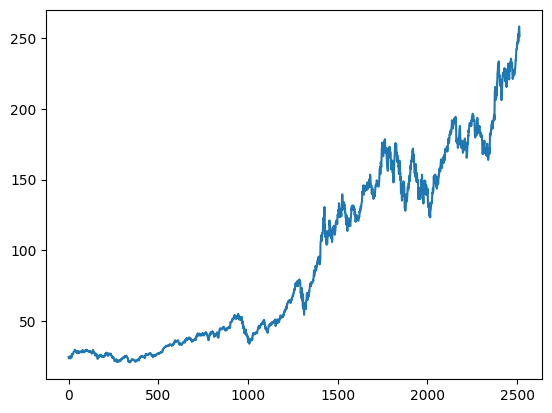

In [6]:
plt.plot(df['Close'])

In [7]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,24.288588,24.757342,23.848713,24.746234,212818400
1,23.604334,24.137514,23.417722,24.057537,257142000
2,23.606564,23.866489,23.244444,23.668768,263188400
3,23.937574,24.037545,23.704307,23.815387,160423600
4,24.857309,24.915071,24.148623,24.266369,237458000
...,...,...,...,...,...
2510,254.655716,255.034791,252.840088,254.156919,40858800
2511,257.578674,257.588630,254.675658,254.875189,23234700
2512,258.396667,259.474086,257.010028,257.568678,27237100


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,228.669740
2511,229.057162
2512,229.558170
2513,230.045265


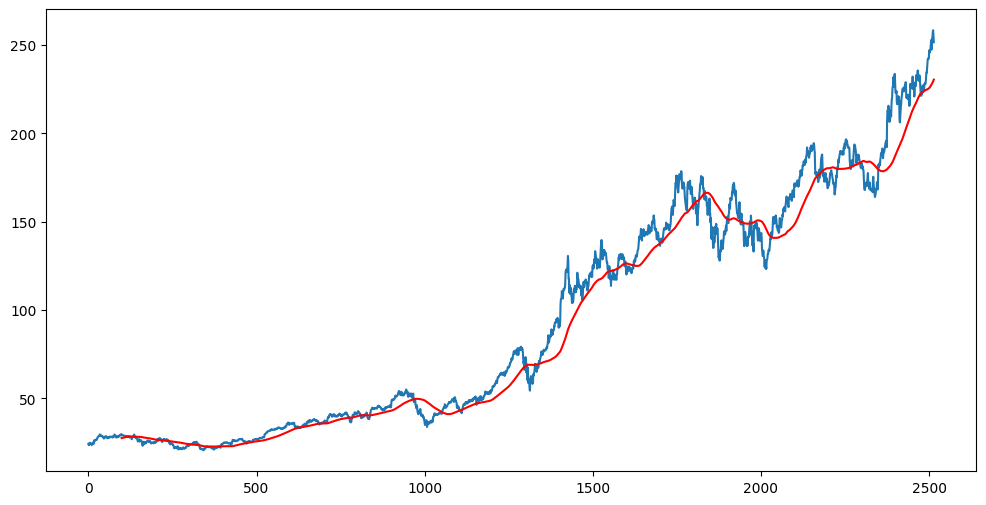

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,210.476670
2511,210.905998
2512,211.337031
2513,211.761392


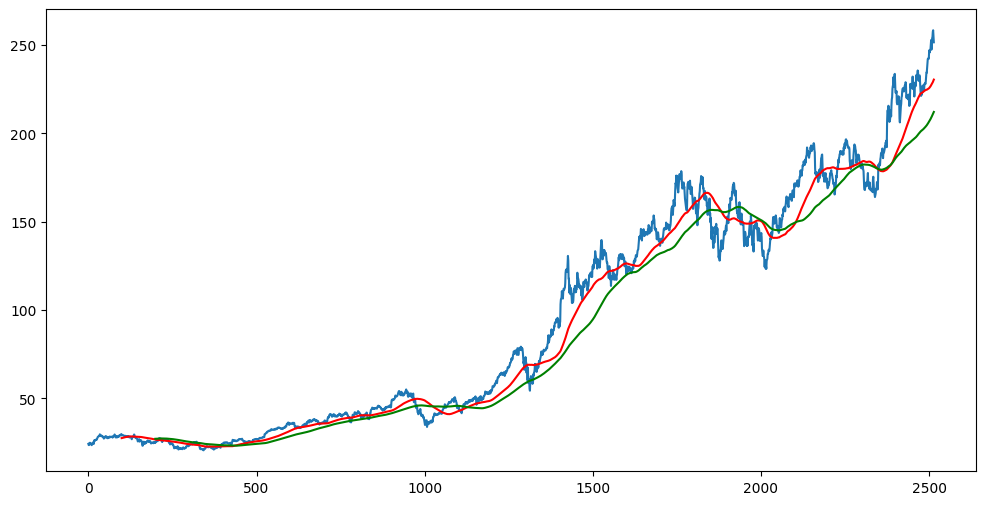

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape


(2515, 5)

In [13]:
#Splitting data into training and testing sets

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [14]:
data_training.head()

Ticker,AAPL
0,24.288588
1,23.604334
2,23.606564
3,23.937574
4,24.857309


In [15]:
data_testing.head()

Ticker,AAPL
1760,176.064270
1761,174.906097
1762,174.287750
1763,178.645676
1764,176.378342


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02328847],
       [0.01891202],
       [0.01892628],
       ...,
       [0.97457513],
       [1.        ],
       [0.99347114]])

In [18]:
data_training_array.shape

(1760, 1)

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i, 0])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
# ML model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [21]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 158ms/step - loss: 0.0539
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 31s 595ms/step - loss: 0.0071
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 40s 565ms/step - loss: 0.0058
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 30s 587ms/step - loss: 0.0034
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 33s 627ms/step - loss: 0.0049
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 27s 519ms/step - loss: 0.0044
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 30s 572ms/step - loss: 0.0039
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 31s 598ms/step - loss: 0.0035
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 373ms/step - loss: 0.0034
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - loss: 0.0032
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - loss: 0.0035
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - loss: 0.0039
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - loss: 0.0035
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - loss: 0.0030
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 1

In [24]:
model.save('keras_model.h5')

In [25]:
data_testing.head()

Ticker,AAPL
1760,176.064270
1761,174.906097
1762,174.287750
1763,178.645676
1764,176.378342


In [26]:
past_100_days = data_training.tail(100)

In [27]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [28]:
final_df.head()

Ticker,AAPL
0,143.229630
1,143.180634
2,142.700409
3,142.955231
4,145.924881


In [29]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(855, 1)

In [30]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [31]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [32]:
# Making predictions
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step


In [33]:
y_predicted.shape

(755, 1)

In [34]:
y_test

array([3.90019353e-01, 3.81438735e-01, 3.76857552e-01, 4.09144358e-01,
       3.92346234e-01, 3.57586827e-01, 3.36353579e-01, 3.37589766e-01,
       3.37734920e-01, 3.58750550e-01, 3.62022856e-01, 3.37734920e-01,
       3.44134152e-01, 3.20355387e-01, 2.94394896e-01, 2.81887533e-01,
       2.66616582e-01, 2.60871676e-01, 2.47491917e-01, 2.46837478e-01,
       2.43419566e-01, 3.24209441e-01, 3.56569050e-01, 3.55332637e-01,
       3.64277159e-01, 3.42897965e-01, 3.40786442e-01, 3.35471573e-01,
       3.58552150e-01, 3.69109989e-01, 3.38820639e-01, 3.13482594e-01,
       3.15230100e-01, 3.43698801e-01, 3.41951408e-01, 3.15230100e-01,
       3.03725931e-01, 2.82028278e-01, 2.51084038e-01, 2.70523996e-01,
       2.85887307e-01, 2.87852997e-01, 2.73873288e-01, 2.98338032e-01,
       2.95934957e-01, 2.73654991e-01, 2.45477051e-01, 2.31934501e-01,
       2.72053205e-01, 2.39797939e-01, 2.12202652e-01, 1.82277545e-01,
       2.14823911e-01, 2.47588687e-01, 2.55088334e-01, 2.79552626e-01,
      

In [35]:
y_predicted

array([[0.3425099 ],
       [0.34366453],
       [0.3455062 ],
       [0.34792858],
       [0.35103694],
       [0.35470992],
       [0.35833555],
       [0.36114478],
       [0.36254668],
       [0.36233872],
       [0.360691  ],
       [0.35799125],
       [0.3545375 ],
       [0.35067606],
       [0.34650308],
       [0.34184414],
       [0.33651847],
       [0.33048543],
       [0.3237993 ],
       [0.3165249 ],
       [0.30858737],
       [0.30012053],
       [0.29220787],
       [0.28594148],
       [0.2823363 ],
       [0.28202018],
       [0.28446776],
       [0.2890439 ],
       [0.2950361 ],
       [0.30189982],
       [0.30927998],
       [0.3165578 ],
       [0.32293573],
       [0.3278013 ],
       [0.33095992],
       [0.3324569 ],
       [0.332335  ],
       [0.33067006],
       [0.32755357],
       [0.32300782],
       [0.31734088],
       [0.31106544],
       [0.30464968],
       [0.29844603],
       [0.29286137],
       [0.28824836],
       [0.28464103],
       [0.281

In [36]:
scaler.scale_

array([0.00740876])

In [37]:
scale_factor = 1 / 0.00996625
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

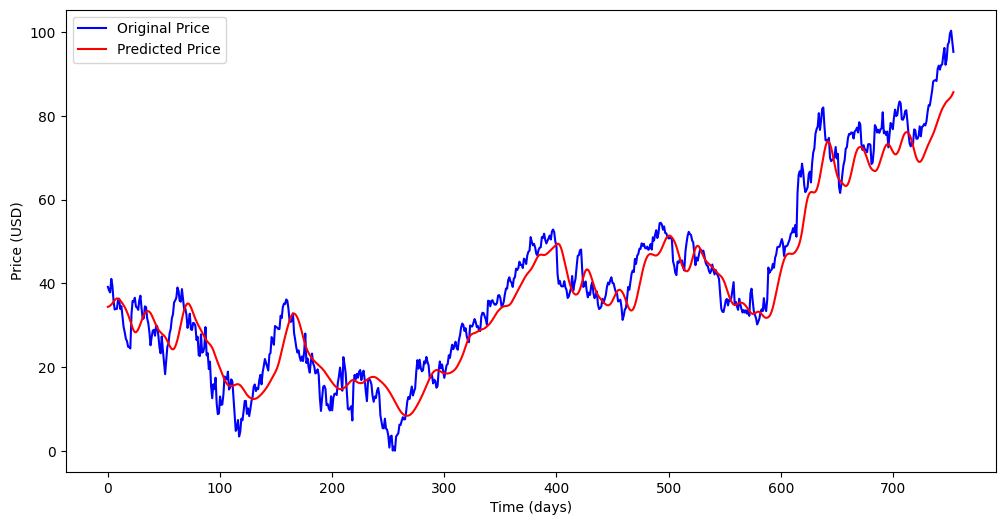

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time (days)')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()